In [3]:
import geopandas as gp
import pandas as pd
import urllib2
import os
import json
import pylab as pl
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
url = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
response = urllib2.urlopen(url)
data = gp.GeoDataFrame.from_csv(response)
#print data.columns

In [5]:
#print data['Borough']
#print data['Direct GHG Emissions(MtCO2e)'].head
#print len(data)
#print data.shape

In [6]:
data.columns = ['BBL', 'BBL_status', 'Co_reported', 'BINs', 'Number', 'Street', 'Borough', 'Zip', 'Benchmark_status', 'EUI', 'Weather_EUI','Source_EUI','Weather_Source_EUI', 'Water', 'Water2', 'Water3', 'Energy_Star', 'GHG_total', 'GHG_direct', 'GHG_indirect', 'Floor_area', 'Total_floor_area', 'Prop_type', 'Number_buildings']
#print data.columns

In [7]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

convert = np.vectorize(canconvert)

In [8]:
index_GHG = convert(data['GHG_direct'])
data['GHG_direct'][~index_GHG] = float('NaN')
data['GHG_direct'] = [float(x) for x in data['GHG_direct']]

#print data['GHG_direct']

/Users/rachelcohen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [9]:
GHG = data.GHG_direct
#pl.plot(GHG)

In [10]:
array = (data['BBL'].groupby(data['Borough']).count())
#print array

array2 = (data['GHG_direct'].groupby(data['Borough']).sum())
#print array2

In [11]:
import statsmodels.formula.api as smf
d = {'building': array, 'ghg': array2}
ols = smf.ols(formula='ghg ~ building', data = d).fit()
#ols.summary()

In [12]:
def reg(i):
    return 423.0837*i - 10092

reg(1000)

412991.7

In [13]:
x = array
y = array2
print (x[0],y[0])

(2741, 1227238.5000000007)


In [14]:
def reg(i):
    return 423.0837*i - 100092

#reg(1000)
#pl.scatter(5,reg(5))

In [15]:
p = np.arange(0, 7000, dtype=np.float)

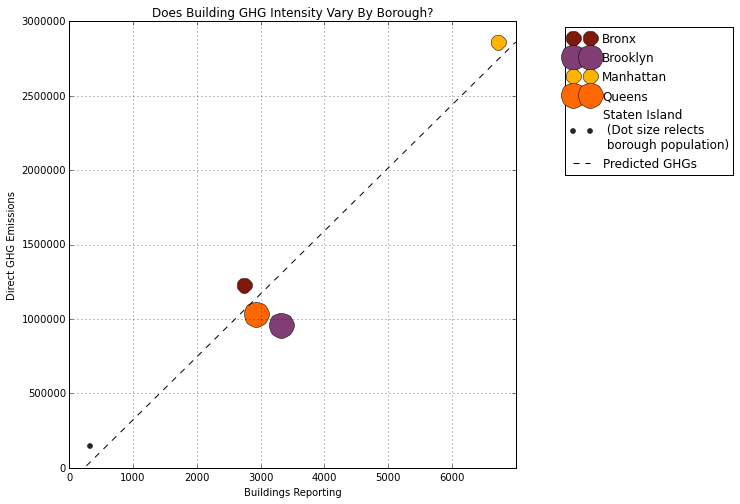

In [16]:
pl.figure(figsize=(8,8))
pl.plot(x[0],y[0], 'o', ms = 15, color = '#7F180D', label = 'Bronx')
pl.plot(x[1],y[1], 'o', ms = 25, color = '#803E75', label = 'Brooklyn')
pl.plot(x[2],y[2], 'o', ms = 15, color = '#FFB300', label = 'Manhattan')
pl.plot(x[3],y[3], 'o', ms = 25, color = '#FF6800', label = 'Queens')
pl.plot(x[4],y[4], 'o', ms = 5, color = '#232C16', label = 'Staten Island\n (Dot size relects\n borough population)')
pl.plot(p,reg(p), '--', color = 'Black', label = 'Predicted GHGs')

pl.grid()
pl.xticks(range(0,7000,1000))
pl.xlabel('Buildings Reporting')
pl.ylabel('Direct GHG Emissions')
pl.title('Does Building GHG Intensity Vary By Borough?')
pl.xlim(0)
pl.ylim(0)
pl.legend(bbox_to_anchor=(1.5, 1))